# 動物標本を用いた局所冷却実験の解析

### 解析するデータ
データは20170924にnumpyデータが入っている
- 2005-04-16-1/S0025
- 2005-08-24-2/S0011
- 2006-02-18-1/S0011

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import copy
%matplotlib inline

In [21]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap

## 20170925のデータを詳細に解析
なぜか出力画像を読み込むと，赤色と青色が反転している・・・

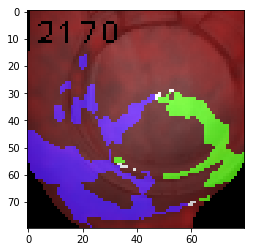

In [69]:
temp = cv2.imread('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-04-16-1/C001S0025@/all/002170.png')
pic = copy.deepcopy(temp)
pic[:, :, 0] = temp[:, :, 2]
pic[:, :, 2] = temp[:, :, 0]

pic = pic[40:120, 20:100, :]
cv2.putText(pic, "{0:0>4}".format(2170), (2,12), cv2.FONT_HERSHEY_PLAIN,.8,(0,0,0))
#cv2.putText(pic, "{0:0>4}".format(1367), (2,10), cv2.FONT_HERSHEY_PLAIN,.5,(255,255,255))
plt.imshow(pic)

In [105]:
for i, time in enumerate(range(2160, 2232)):
    temp = cv2.imread('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-04-16-1/C001S0025@/all/{0:06d}.png'.format(time))
    pic = copy.deepcopy(temp)
    #pic[:, :, 0] = temp[:, :, 2]
    #pic[:, :, 2] = temp[:, :, 0]
    
    pic = pic[60:120, 20:80, :]
    cv2.putText(pic, "{0:0>4}".format(time), (2,12), cv2.FONT_HERSHEY_PLAIN,.8,(0,0,0))
    cv2.imwrite('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170926/2005-04-16-1/C001S0025@/scene1/{0:0>6}.png'.format(i), pic)

In [106]:
cmd = 'ffmpeg -r 5 -y -i "{0}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170926/2005-04-16-1/C001S0025@/scene1')

In [107]:
subprocess.call(cmd, shell=True)

0